PCA or multiple linear regression ??
--> did linear regression to start with

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data
data = pd.ExcelFile('GordonChristopher_LE BN CR data for figures - Body Comp.xlsx')
sheetnames=data.sheet_names

In [3]:
# import all the worksheets
d={}
sheetname=[None] * 13
for i in range(13):
    name=sheetnames[i].replace(' ', '') # remove space from the worksheetname
    sheetname[i]=name
    if i == 0:
        globals()[name]= data.parse(sheetnames[i],header=1)
    else:
        globals()[name]= data.parse(sheetnames[i])

In [5]:
# clean up the data
mymice=np.arange(60)
for x in sheetname:
    existmice=np.where(pd.isnull(globals()[x].iloc[:,6])==False) # remove overfat and dead mice
    notaverow=np.where(pd.isnull(globals()[x].iloc[:,0])==False) # remove average row from data
    bothrow=np.intersect1d(existmice,notaverow) # the overlapping row within one worksheet
    mymice=np.intersect1d(mymice,bothrow) # overlapping between worksheet

In [6]:
# get the 'new' dataset
newsheetname=[None] * 13
for i in range(13):
    x='new'+sheetname[i]
    newsheetname[i]=x
    globals()[x]=globals()[sheetname[i]].iloc[mymice,:] # only the mice never have miss any data

In [11]:
# weight for 'Bn ad lib'
y=[None] * 13
ave=[None] * 13
for i in range(13):   
    BL=globals()[newsheetname[i]][globals()[newsheetname[i]]['Group'].str.contains('BN ad lib',case=False)]
    # filter out 'BN ad lib' group
    
    
    
    BNL=BL.iloc[:,9] # the weight for that group
    y[i]=BNL # all the weight on the same day as one part in the list y
    ave[i]=np.mean(BNL) # average weight on each day
x=[89,117,152,180,209,244,272,300,335,363,384,421,447]

In [16]:
def test_train_id(N,test_frac):
    testnumber=round(N*test_frac)
    ids=np.arange(N)
    np.random.shuffle(ids)
    test=ids[0:testnumber]
    train=ids[testnumber:]       
    return train,test

,Program,Strain,Age,Sample ID,Date/Time,Group,Fat (g),Lean (g),Fluid (g),Sample Weight (g),% Fat,% Lean,% Fluid,% Total
0,ratV4,BN,447 day,E317rv4-1,"MAR.11,2013 09:42",BN ad lib,45.7,309.5,33.1,399.0,11.4,77.6,8.3,97.3
1,ratV4,BN,447 day,E317rv4-2,"MAR.11,2013 09:45",BN ad lib,40.8,324.7,32.2,410.0,10.0,79.2,7.9,97.1
2,ratV4,BN,447 day,E317rv4-3,"MAR.11,2013 09:46",BN ad lib,63.9,351.6,35.5,449.0,14.2,78.3,7.9,100.4
3,ratV4,BN,447 day,E317rv4-4,"MAR.11,2013 09:47",BN ad lib,40.3,337.4,35.5,432.0,9.3,78.1,8.2,95.6
4,ratV4,BN,447 day,E317rv4-5,"MAR.11,2013 09:49",BN ad lib,52.0,323.3,31.9,414.0,12.5,78.1,7.7,98.3
5,ratV4,BN,447 day,E317rv4-6,"MAR.11,2013 09:50",BN ad lib,50.1,320.5,31.9,413.0,12.1,77.6,7.7,97.4
6,ratV4,BN,447 day,E317rv4-7,"MAR.11,2013 09:51",BN ad lib,64.4,354.5,35.0,451.0,14.3,78.6,7.7,100.6
7,ratV4,BN,447 day,E317rv4-8,"MAR.11,2013 09:53",BN ad lib,50.6,348.9,36.1,447.0,11.3,78.0,8.1,97.4


In [17]:
# weight for 'Bn ad lib'
yB10=[None] * 13
aveB10=[None] * 13
for i in range(13):   
    BL10=globals()[newsheetname[i]][globals()[newsheetname[i]]['Group'].str.contains('BN 10% restriction',case=False)]

In [24]:
indee=list(BL10.index)

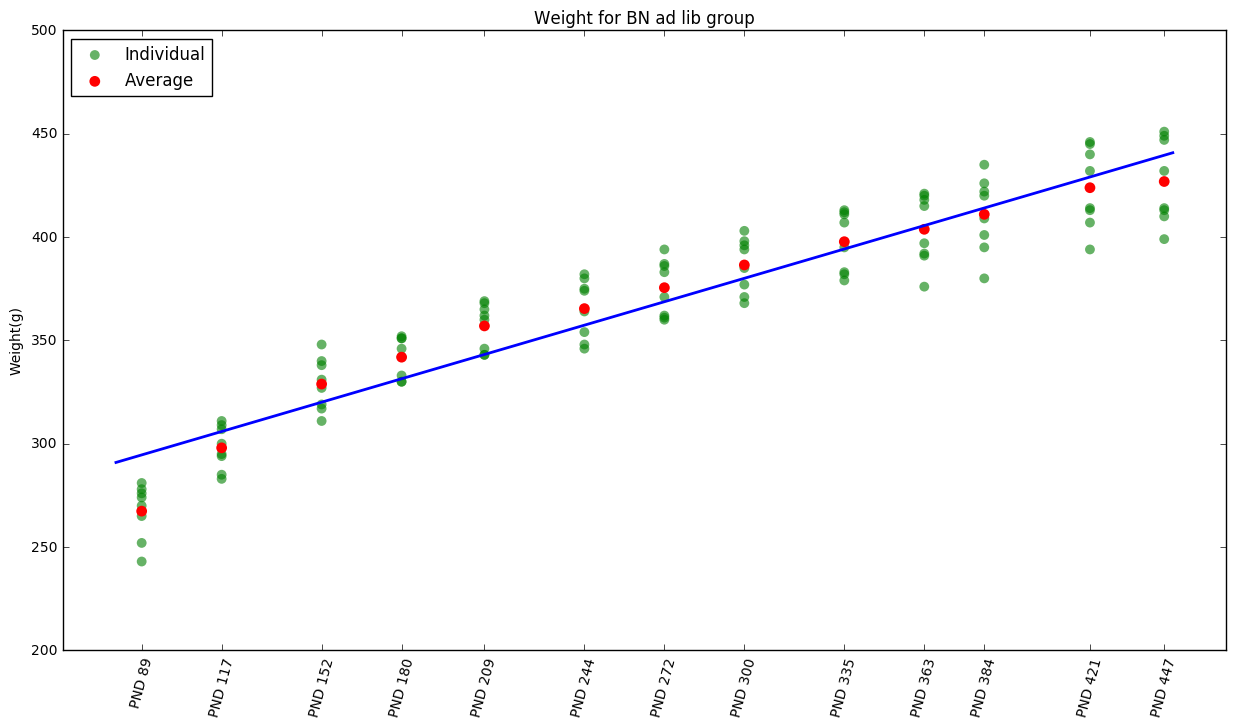

In [8]:
Fig=plt.figure(figsize=(15,8))

for xe, ye in zip(x, y):
    indi=plt.scatter([xe] * len(ye), ye, c="green",alpha=0.6,s=50,edgecolors='none')

plt.xticks([89,117,152,180,209,244,272,300,335,363,384,421,447])
plt.axes().set_xticklabels(sheetnames,rotation=75)

average=plt.scatter(x,ave, c="red",s=60,edgecolors='none',label="Aveage")

plt.legend((indi,average),
           ('Individual', 'Average'),
           scatterpoints=1,
           loc='upper left')


from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(np.asarray(x)[:,np.newaxis], np.asarray(ave))

xx = np.linspace(80, 450, 1000)
yy = model.predict(xx[:, np.newaxis])
plt.plot(xx, yy, 'b',linewidth=2.0)

plt.title('Weight for BN ad lib group')
plt.ylabel('Weight(g)')

In [9]:
def test_train_id(N,test_frac):
    testnumber=round(N*test_frac)
    ids=np.arange(N)
    np.random.shuffle(ids)
    test=ids[0:testnumber]
    train=ids[testnumber:]       
    return train,test

In [25]:
whos

Variable           Type                Data/Info
------------------------------------------------
BL                 DataFrame             Program Strain      Age<...> 78.0      8.1     97.4  
BL10               DataFrame              Program Strain      Ag<...>    96.5  \n17    100.4  
BNL                Series              0    399.0\n1    410.0\n2<...>eight (g), dtype: float64
Fig                Figure              Figure(1080x576)
LinearRegression   ABCMeta             <class 'sklearn.linear_mo<...>l.base.LinearRegression'>
PND117             DataFrame              Program Strain      Ag<...>6  0.049776    0.390398  
PND152             DataFrame              Program Strain      Ag<...>2  0.086474    0.374374  
PND180             DataFrame              Program Strain      Ag<...>9  0.086603    0.363883  
PND209             DataFrame              Program Strain      Ag<...>4  0.051539    0.446714  
PND244             DataFrame              Program Strain      Ag<...>4  0.084383    0.